# AirBnb Listing Analysis

## Objective 1: Date Prep & QA
* Read in the AirBNB listings Data (use low_memory=False and encoding="ISO-8859-1 in read_csv)
* Cast any data columns as a datetime format.
* Filter down the data to just listings in the city of Paris.
* QA the paris listings data: check for missing values, and calculate the minimum, and average for each numberic field.

In [1]:
import pandas as pd

listings = pd.read_csv(
    "Listings.csv", 
    encoding="ISO-8859-1", 
    low_memory=False,
    parse_dates=["host_since"]
)

In [2]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [4]:
paris_listings = (
    listings
    .query("city == 'Paris'")
    .loc[:, ["host_since", "neighbourhood", "city", "accommodates", "price" ]]
)
         
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [5]:
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [6]:
paris_listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [7]:
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [8]:
paris_listings.query("price == 0").count()

host_since       62
neighbourhood    62
city             62
accommodates     62
price            62
dtype: int64

In [9]:
paris_listings.query("price == 0 and accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

# Objective 2: Prepare for Visualization

* Create a DataFrame called paris_listings_neighbourhood. Group the Paris listings by neighbourhood and calculate the average price for each. Sort by price in ascending order.
* Create a DataFrame called paris_listings_neighbourhood. Filter your data down to the most expensice neighbourhood in Parus. Group it by accommodates and calculate the average price for each. Sort by price in ascending order.
* Finally, creeate a DataFrame called paris_listings_over_time. Group the data by the year component of host_sincee. Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each year.

In [10]:
paris_listings_neighbourhood = (
    paris_listings
    .groupby("neighbourhood")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [11]:
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [12]:
paris_listings_accommodates = (
    paris_listings
    .query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price": "mean"})
    .sort_values("price")
)

paris_listings_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [13]:
paris_listings_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [14]:
paris_listings_over_time = (
    paris_listings
    .set_index("host_since")
    .resample("Y")
    .agg({
        "neighbourhood": "count", 
        "price": "mean"
    })
)

paris_listings_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


In [15]:
paris_listings_over_time.tail()

,neighbourhood,price
host_since,,
2017-12-31,4585,108.658888
2018-12-31,4294,138.209362
2019-12-31,5694,129.757113
2020-12-31,3412,141.456038
2021-12-31,133,93.488722


# Objective 3: Visualize the Data
* Build a horizontal bar chart of average rent price by neighbourhood. Which neighbourhoods stand out?
* Build a horizontal bar chart of averahe price by accomodates in the most expensive neighbourhood. are the results intuitive?
* Finally, build line charts of new hosts per year and average price by year. What happened to new hosts in 2015? Was average price impacted
* Challenge: Plot both time series in a dual axis line chart!

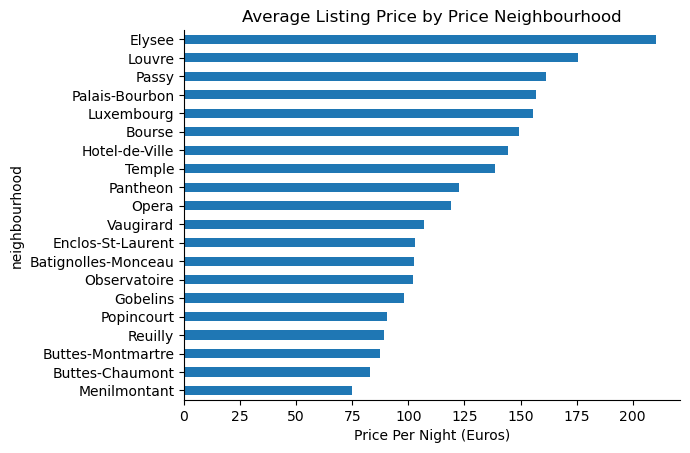

In [16]:
import seaborn as sns
(paris_listings_neighbourhood
    .plot
    .barh(
        title="Average Listing Price by Price Neighbourhood",
        xlabel="Price Per Night (Euros)",
        ylabel="neighbourhood",
        legend=None
    )
         
)

sns.despine()

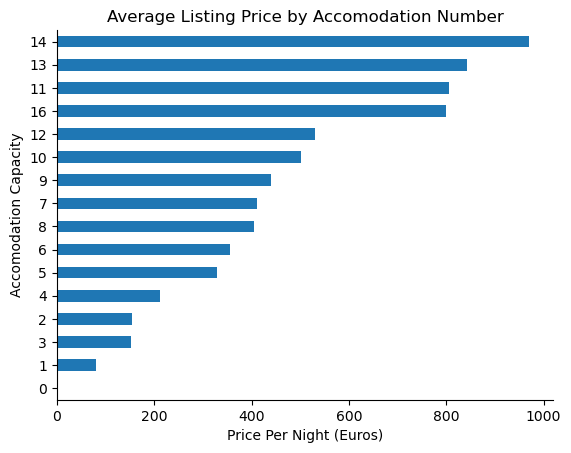

In [17]:
import seaborn as sns
(paris_listings_accommodates
    .plot
    .barh(
        title="Average Listing Price by Accomodation Number",
        xlabel="Price Per Night (Euros)",
        ylabel="Accomodation Capacity",
        legend=None
    )
         
)

sns.despine()

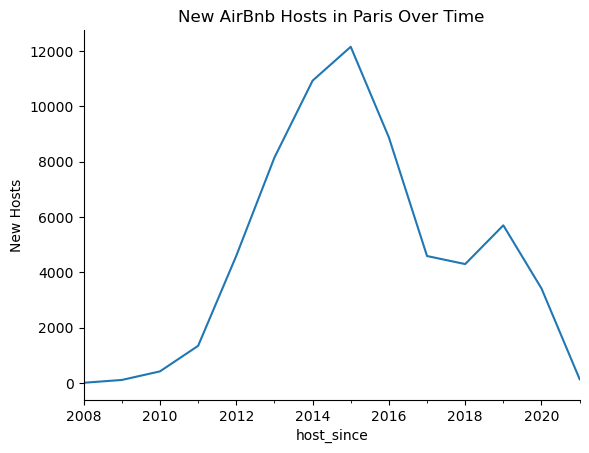

In [18]:
paris_listings_over_time["neighbourhood"].plot(
    ylabel="New Hosts",
    title="New AirBnb Hosts in Paris Over Time"
)

sns.despine()

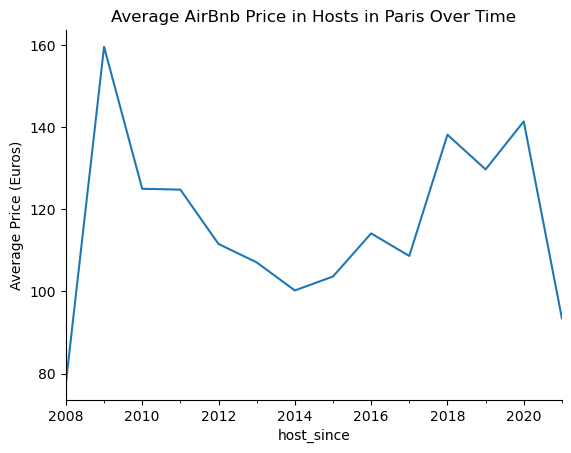

In [19]:
paris_listings_over_time["price"].plot(
    ylabel="Average Price (Euros)",
    title="Average AirBnb Price in Hosts in Paris Over Time"
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts, Higher Prices')

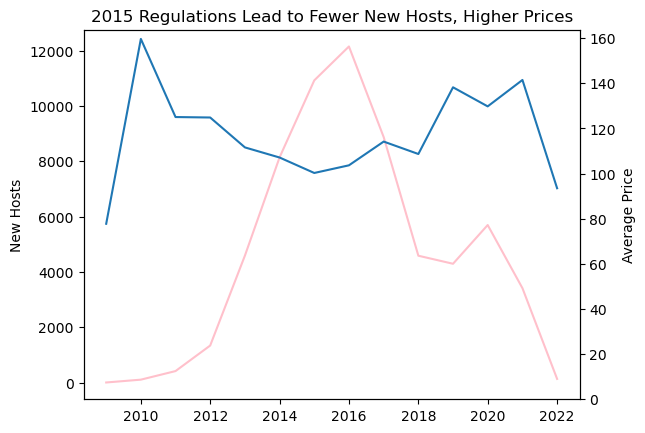

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["neighbourhood"],
    label="New Hosts",
    c="pink"
)

ax.set_ylabel("New Hosts")

ax2 = ax.twinx()

ax2.plot(
    paris_listings_over_time.index,
    paris_listings_over_time["price"],
    label="Average Price"
)
ax2.set_ylim(0)
ax2.set_ylabel("Average Price")

ax.set_title("2015 Regulations Lead to Fewer New Hosts, Higher Prices")